In [57]:
# https://github.com/CSchoel/learn-wavelets/blob/main/wavelet-introduction.ipynb

import numpy as np
from matplotlib import pyplot as plt

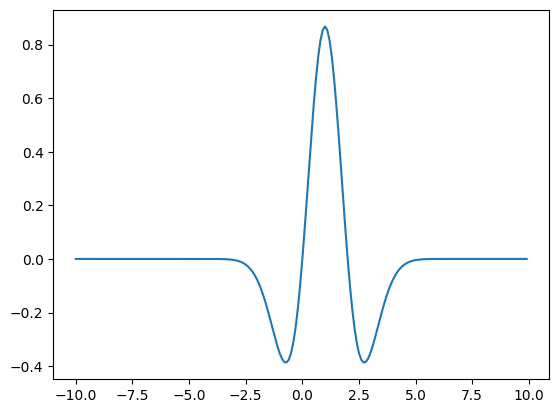

In [58]:
def mexican_hat(x, mu, sigma):
    c1 = 2.0 / (np.sqrt(3 * sigma) * np.pi**0.25)
    c2 = 1.0 - ((x - mu) ** 2 / sigma**2)
    c3 = np.exp(-((x - mu) ** 2) / 2.0 * sigma**2)
    return c1 * c2 * c3


xvals = np.arange(-10, 10, 0.1)
yvals = mexican_hat(xvals, 1, 1)
plt.plot(xvals, yvals)

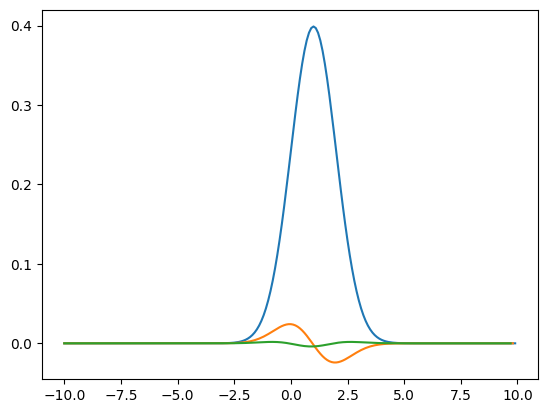

In [59]:
def gauss(x, mu, sigma):
    c1 = 1.0 / (sigma * np.sqrt(2.0 * np.pi))
    c2 = np.exp(-((x - mu) ** 2) / (2.0 * sigma**2))
    return c1 * c2


xvals = np.arange(-10, 10, 0.1)
yvals = gauss(xvals, 1, 1)
plt.plot(xvals, yvals)
# first derivative
gd = yvals[1:] - yvals[:-1]
plt.plot(xvals[:-1], gd)
# second derivative
gdd = gd[1:] - gd[:-1]
plt.plot(xvals[:-2], gdd)

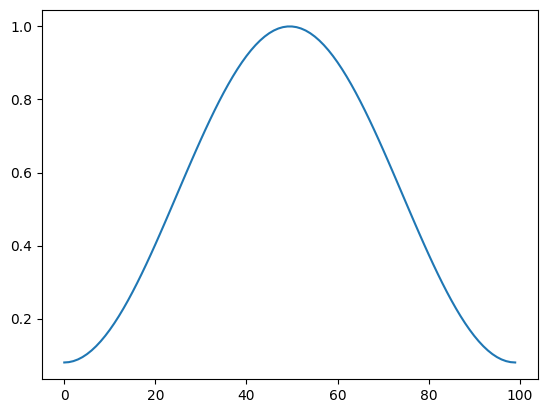

In [60]:
def hamming(n):
    return 0.54 - 0.46 * np.cos(2 * np.pi * np.arange(n) / (n - 1))


h = hamming(100)
plt.plot(h)

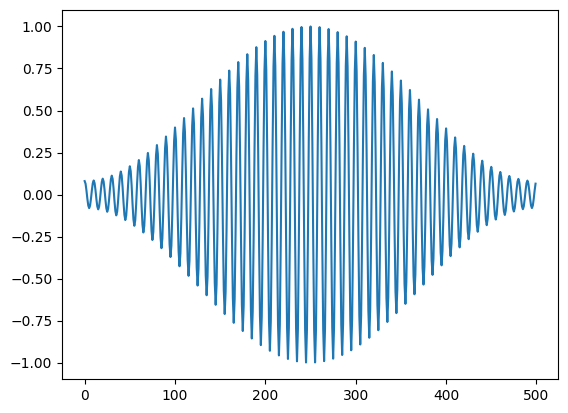

In [61]:
def sound(freq, dur, res):
    ln = dur * res
    sound = np.cos(np.arange(ln) * 2 * np.pi * freq / res)
    sound = sound * hamming(ln)
    return sound


sound_100 = sound(100, 0.5, 1000)
plt.plot(sound_100)

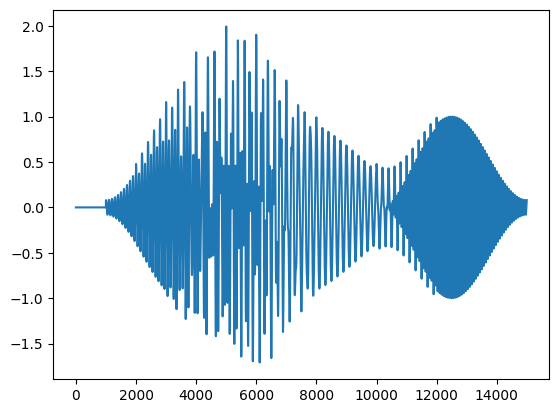

In [62]:
def add_sound(audio, loc, freq, dur, res):
    audio[int(loc) : int(loc + dur * res)] += sound(freq, dur, res)


res = 10000
audio = np.zeros(15000)
add_sound(audio, 1000, 100, 0.5, res)
add_sound(audio, 3000, 130, 0.5, res)
add_sound(audio, 2000, 50, 1, res)
add_sound(audio, 10000, 150, 0.5, res)
plt.plot(audio)

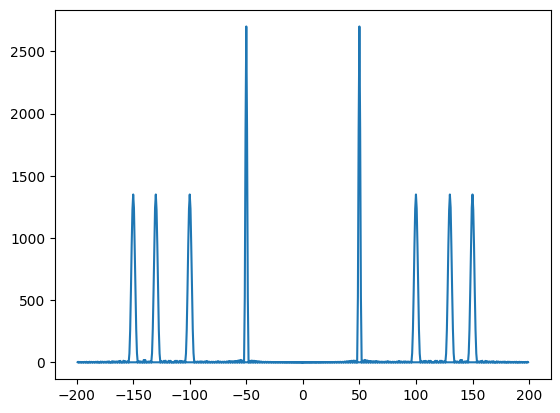

In [63]:
fourier = np.fft.fft(audio)
xvals = np.fft.fftfreq(len(audio)) * res
idx = np.where(np.abs(xvals) < 200)
plt.plot(xvals[idx], np.abs(fourier)[idx])

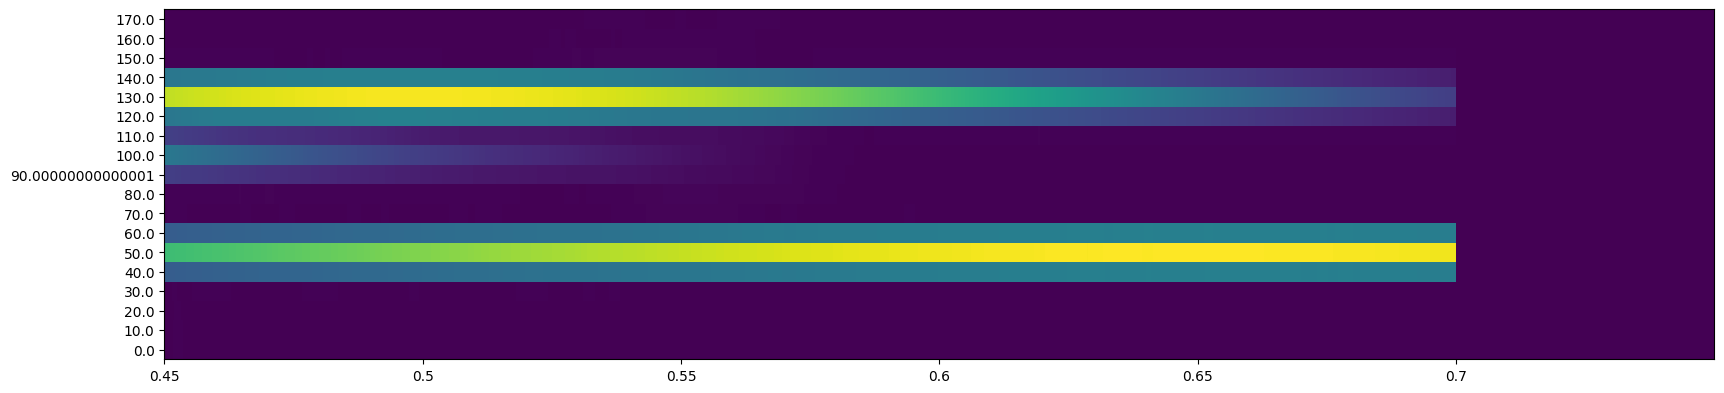

In [64]:
# windowed Fourier transform
def fourier_w(signal, window_size):
    out = np.zeros((len(signal), window_size))
    hamming_window = hamming(window_size)
    for idx in range(0, len(signal) - window_size):
        wsig = signal[idx:idx+window_size] * hamming_window
        out[idx] = np.abs(np.fft.fft(wsig))
    return out

window_size=1000
start = 4000
end = 8000
fs = 0
fe = 18
fw = fourier_w(audio[start:end], window_size)
fwcut = fw[window_size//2:-window_size//2,fs:fe]
plt.figure(figsize=(20,10))
plt.subplot(211)
plt.pcolormesh(fwcut.T)
xt = np.arange(0,len(fwcut),window_size//2)
plt.xticks(xt,(xt+start+window_size//2)/res)
yt = np.arange(0,len(fwcut[0]),1)
plt.yticks(yt+0.5,(np.fft.fftfreq(window_size)*res)[yt+fs])
plt.show()

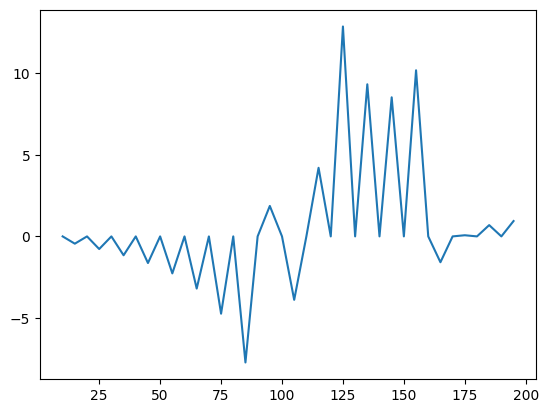

In [66]:
def fourier_coeff_i(signal, freq, res):
    sin_wave = -np.sin(np.arange(len(signal)) * 2 * np.pi * freq / res)
    return np.sum(signal * sin_wave)

def fourier_coeff_r(signal, freq, res):
    cos_wave = np.cos(np.arange(len(signal)) * 2 * np.pi * freq / res)
    return np.sum(signal * cos_wave)

res = 10000
coeffsi = []
coeffsr = []
fs = []
for f in range(10, 200, 5):
    ci = fourier_coeff_i(audio, f, res)
    cr = fourier_coeff_r(audio, f, res)
    coeffsi.append(ci)
    coeffsr.append(cr)
    fs.append(f)
plt.plot(fs, coeffsi)
# plt.plot(fs, coeffsr)